In [1]:
import os
import sys
import pandas as pd

# Only the TensorFlow backend supports string inputs.
os.environ["KERAS_BACKEND"] = "tensorflow"

sys.path.append(os.path.abspath("../../src/"))
from data_acquisition_understanding.dnn_datasets_preparation import read_and_concat_catalogs, clean_and_split_catalog

## Loading and preparing the datasets

Reading and merging catalog and mapping files

In [2]:
columns = ["OBJECT_ID", "FITS_ID", "CCD_ID", "ISO0", "BACKGROUND", "ELLIPTICITY", "ELONGATION", "CLASS_STAR", "FLAGS", "EXPTIME"]
data_path = "../../data/"
proc_path = os.path.join(data_path, "processed")
fm_path = os.path.join(data_path, "for_modeling")


In [4]:
catalog_cadc = pd.read_parquet(os.path.join(fm_path, "objects_catalog_cadc_bronze.parquet.gz"), engine="auto")
print(catalog_cadc.info())
print(catalog_cadc.describe())
# number of rows 
limit_pb = int(0.884 * 2118974)
print(catalog_cadc[limit_pb:limit_pb + 10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104028 entries, 0 to 2104027
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   OBJECT_ID    object 
 1   FITS_ID      object 
 2   CCD_ID       uint8  
 3   ISO0         float32
 4   BACKGROUND   float32
 5   ELLIPTICITY  float32
 6   ELONGATION   float32
 7   CLASS_STAR   float32
 8   FLAGS        int16  
 9   EXPTIME      float64
 10  gt_label1    object 
 11  gt_label2    object 
dtypes: float32(5), float64(1), int16(1), object(4), uint8(1)
memory usage: 126.4+ MB
None
             CCD_ID          ISO0    BACKGROUND   ELLIPTICITY    ELONGATION  \
count  2.104028e+06  2.104028e+06  2.104028e+06  2.104028e+06  2.104028e+06   
mean   1.912686e+01  2.278204e+02  1.864034e+00  4.421524e-01  2.843852e+00   
std    1.177998e+01  2.645570e+03  6.645344e-01  2.470785e-01  3.834854e+01   
min    1.000000e+00  3.000000e+00 -2.000000e+00  1.000000e-05  1.000000e+00   
25%    9.000000e+00  2.000000e+01  2.

In [5]:
catalog_paths = [
        os.path.join(fm_path, "objects_catalog_cadc_bronze.parquet.gz"),
        os.path.join(fm_path, "objects_catalog_ngc0869_bronze.parquet.gz"),
        os.path.join(fm_path, "objects_catalog_ngc0896_bronze.parquet.gz"),
        os.path.join(fm_path, "objects_catalog_ngc7000_bronze.parquet.gz")
    ]

catalog = read_and_concat_catalogs(catalog_paths) 

CADC catalog size:  (1873000, 12)


In [6]:
print(catalog.info())
print(catalog.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887946 entries, 0 to 1887945
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   OBJECT_ID    object 
 1   FITS_ID      object 
 2   CCD_ID       uint8  
 3   ISO0         float32
 4   BACKGROUND   float32
 5   ELLIPTICITY  float32
 6   ELONGATION   float32
 7   CLASS_STAR   float32
 8   FLAGS        int16  
 9   EXPTIME      float64
 10  gt_label1    object 
 11  gt_label2    object 
dtypes: float32(5), float64(1), int16(1), object(4), uint8(1)
memory usage: 113.4+ MB
None
             CCD_ID          ISO0    BACKGROUND   ELLIPTICITY    ELONGATION  \
count  1.887946e+06  1.887946e+06  1.887946e+06  1.887946e+06  1.887946e+06   
mean   1.875181e+01  2.037169e+02  1.855446e+00  4.413558e-01  2.837952e+00   
std    1.176979e+01  2.421631e+03  6.844760e-01  2.478057e-01  3.998646e+01   
min    1.000000e+00  3.000000e+00 -2.000000e+00  1.000000e-05  1.000000e+00   
25%    9.000000e+00  2.100000e+01  2.

In [7]:
for col in catalog.columns:
    print(col, catalog[col].value_counts())

OBJECT_ID OBJECT_ID
53a42a69eff0455596ce0db32f1a391f    1
4d5612701313415bb294ca526a8b47af    1
1f459fcb060a40ad993ef7ead8f1940e    1
f73c472e896145cda7c3ec639f601fcf    1
52e5bc35598d40fe8beeb66fe19e4249    1
                                   ..
dba93159a22e4388be3644dcce0bfb39    1
632c930015c744218d4382fd3111fe96    1
88c5700cd733455cbdd5d265c10ceff9    1
03006c8244d14378bedb62d7e5d4f7ca    1
b22aaa8214a345269dd883f25cbd01d7    1
Name: count, Length: 1887946, dtype: int64
FITS_ID FITS_ID
1625632p                    215728
1625633p                    210245
1635753p                    180874
1110042p                    119992
1625589p                    107977
                             ...  
ngc7000_080624_raw_00085        28
ngc7000_080624_raw_00081        25
ngc0869_030524_raw_00016        25
ngc7000_080624_raw_00076        25
ngc0869_030524_raw_00014        22
Name: count, Length: 195, dtype: int64
CCD_ID CCD_ID
1     68340
2     58919
8     57975
20    55810
9     54952
23   

In [8]:
# looking for problematic values
for col in columns:
    print("Column {col}: detected NaN or Infvalues ?".format(col=col))
    print(catalog[catalog[col].isna()]["FITS_ID"].value_counts())

Column OBJECT_ID: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column FITS_ID: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column CCD_ID: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ISO0: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column BACKGROUND: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ELLIPTICITY: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ELONGATION: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column CLASS_STAR: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column FLAGS: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column EXPTIME: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)


## Plotting histograms of raw numerical features

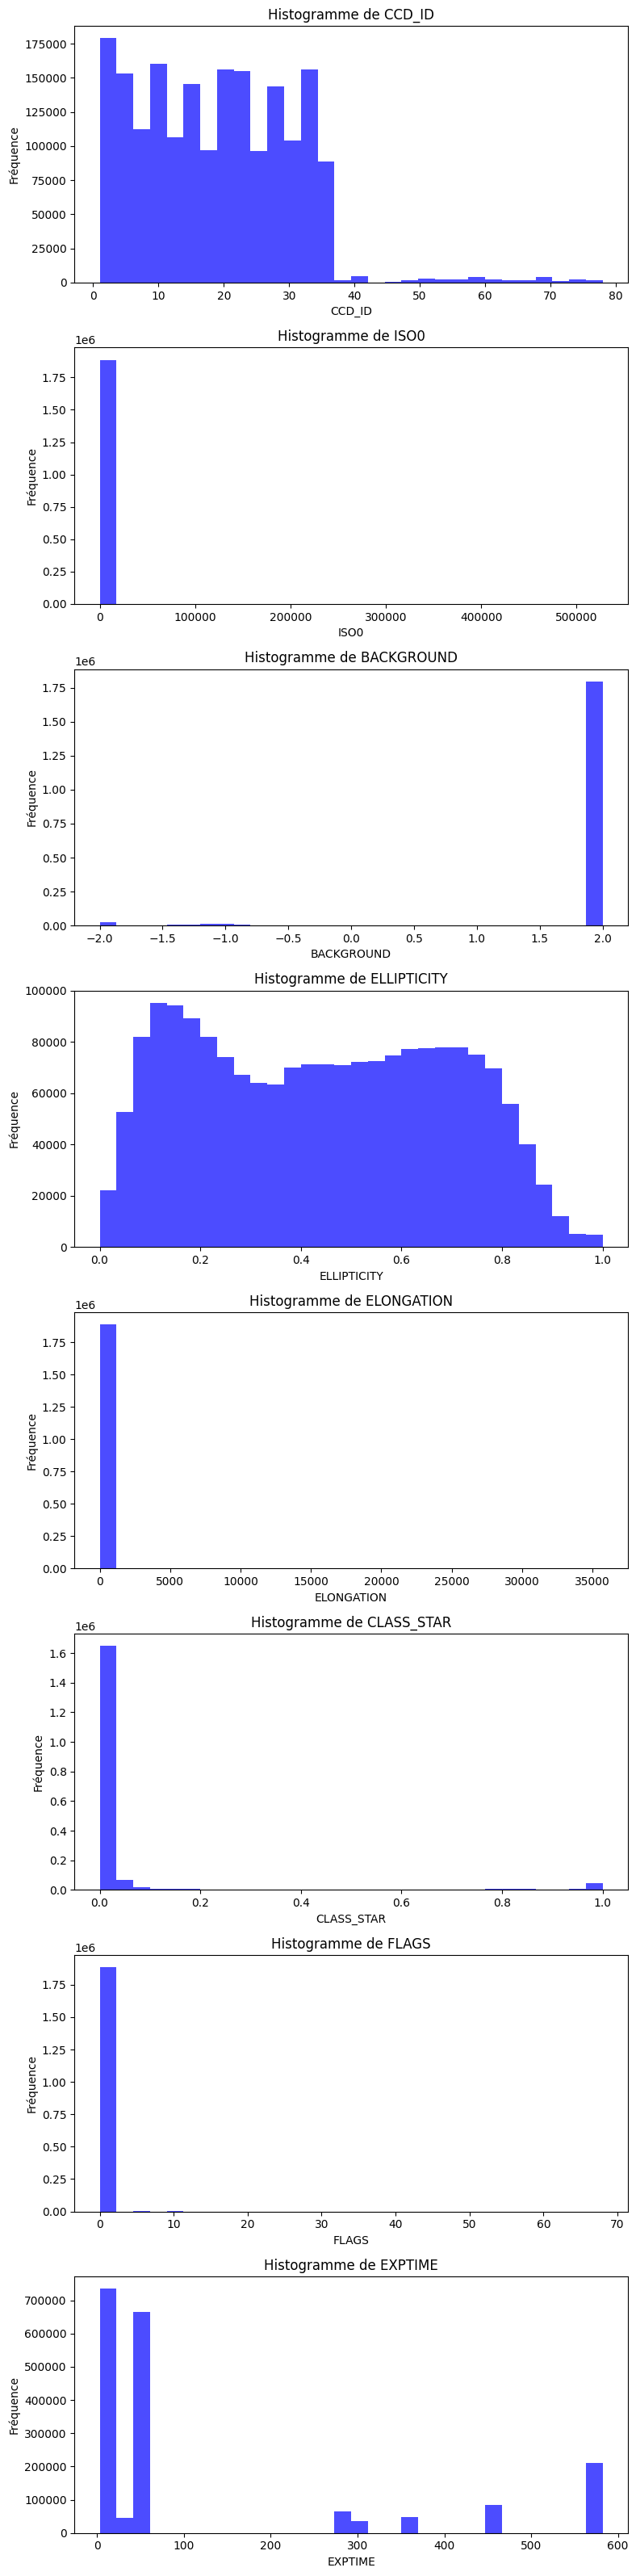

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Select numeric columns for histogram plotting
numeric_cols = catalog.select_dtypes(include=['number']).columns

# Create a figure with subplots for each numeric column
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, 4*len(numeric_cols)))
if len(numeric_cols) == 1:
    axes = [axes]  # Ensure axes is iterable

for ax, col in zip(axes, numeric_cols):
    ax.hist(catalog[col].dropna(), bins=30, color='blue', alpha=0.7)
    ax.set_title(f'Histogramme de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

## Analyzing outliers and distribution of numerical features

Feature: CCD_ID
Lower Bound: -19.50
Upper Bound: 56.50
Number of Outliers: 18577
----------------------------------------


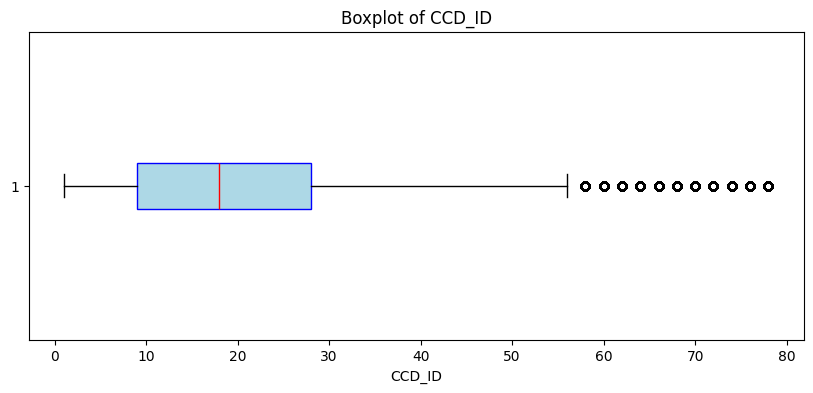

Feature: ISO0
Lower Bound: -142.50
Upper Bound: 293.50
Number of Outliers: 173008
----------------------------------------


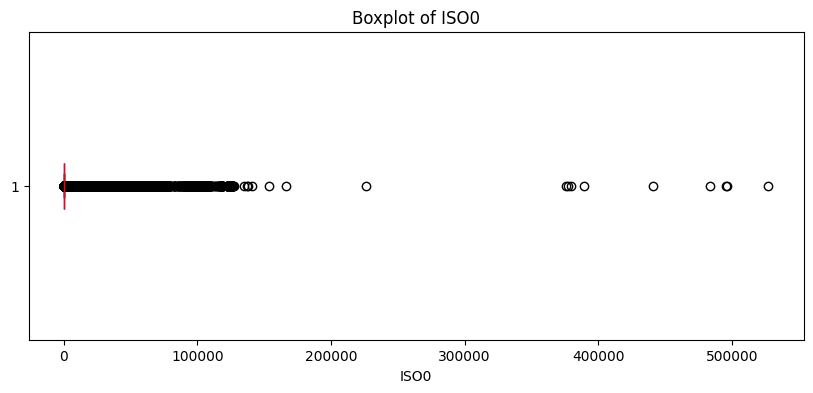

Feature: BACKGROUND
Lower Bound: 2.00
Upper Bound: 2.00
Number of Outliers: 96527
----------------------------------------


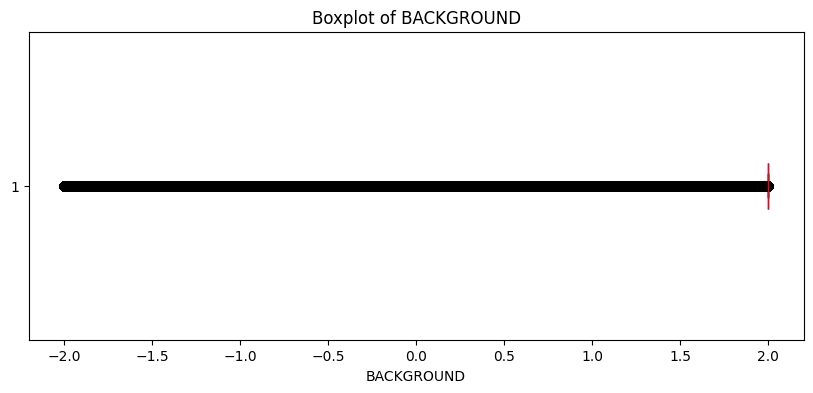

Feature: ELLIPTICITY
Lower Bound: -0.45
Upper Bound: 1.31
Number of Outliers: 0
----------------------------------------


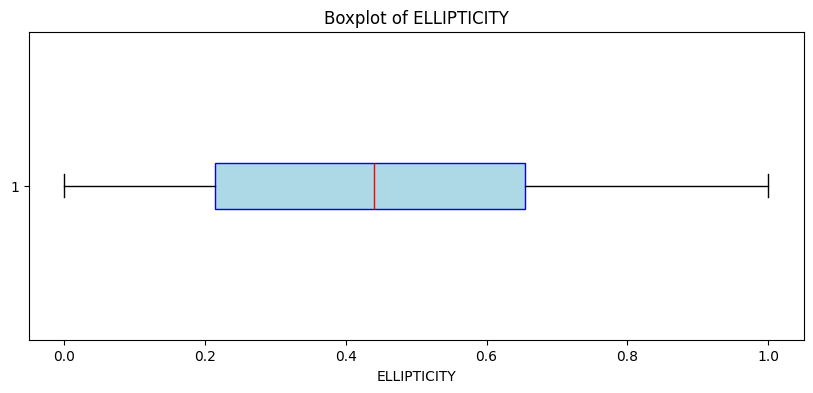

Feature: ELONGATION
Lower Bound: -1.16
Upper Bound: 5.32
Number of Outliers: 119594
----------------------------------------


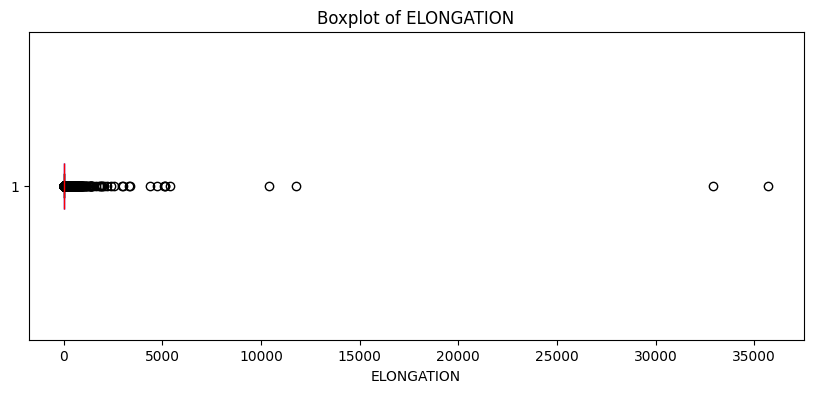

Feature: CLASS_STAR
Lower Bound: -0.00
Upper Bound: 0.00
Number of Outliers: 437041
----------------------------------------


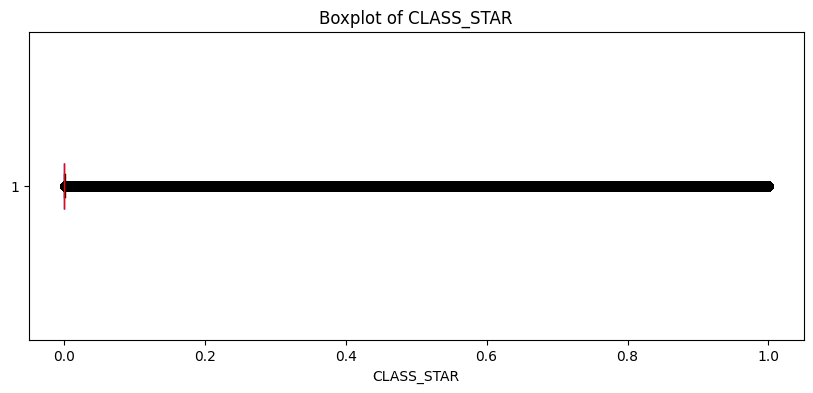

Feature: FLAGS
Lower Bound: -3.00
Upper Bound: 5.00
Number of Outliers: 3126
----------------------------------------


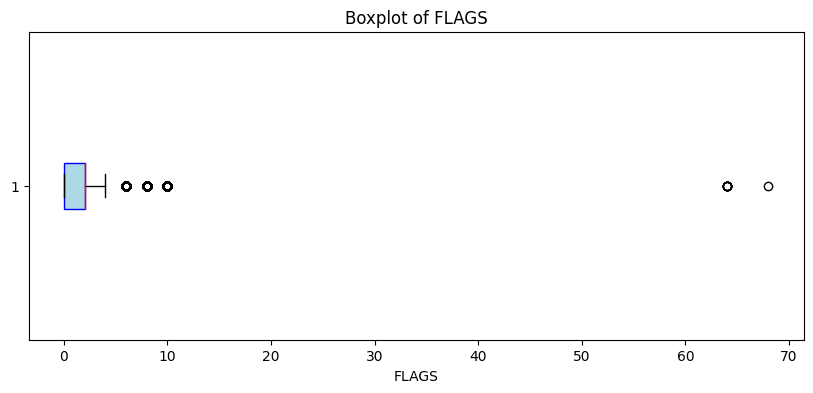

Feature: EXPTIME
Lower Bound: -65.35
Upper Bound: 135.74
Number of Outliers: 443615
----------------------------------------


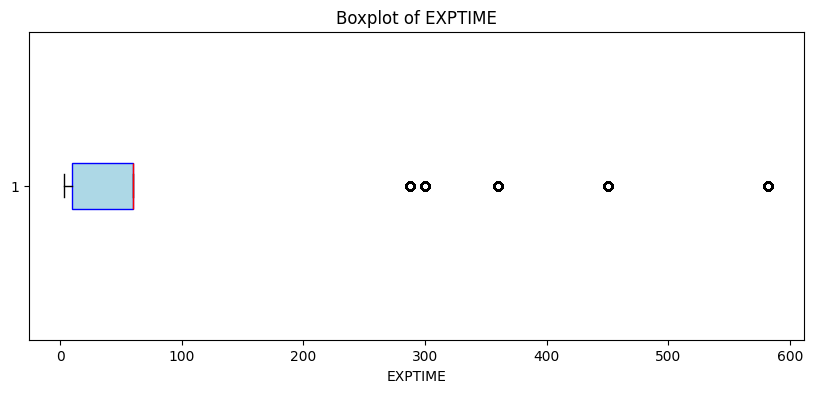

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def detect_outliers(df: pd.DataFrame, column: str):
    """
    Detects outliers in a column using the IQR method.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to analyze.
    
    Returns:
        tuple: A tuple containing:
            - outliers (pd.DataFrame): Rows in which the column has outlier values.
            - lower_bound (float): Lower bound for outliers.
            - upper_bound (float): Upper bound for outliers.
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers and plot boxplots for each numeric column
for col in numeric_cols:
    outliers, lower_bound, upper_bound = detect_outliers(catalog, col)
    print(f'Feature: {col}')
    print(f'Lower Bound: {lower_bound:.2f}')
    print(f'Upper Bound: {upper_bound:.2f}')
    print(f'Number of Outliers: {len(outliers)}')
    print("-" * 40)
    
    plt.figure(figsize=(10, 4))
    plt.boxplot(catalog[col].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [11]:
# Checking the correction
print(catalog[catalog["gt_label1"].isna()]["FITS_ID"].value_counts())

Series([], Name: count, dtype: int64)


In [12]:
catalog_cleaned = catalog.dropna(subset=["gt_label1"])
catalog_cleaned = catalog_cleaned.drop(columns=["gt_label2", "OBJECT_ID"])

In [13]:
train_df, val_df, test_df, class_weights = clean_and_split_catalog(
    catalog,
    "gt_label1",
    ["gt_label2", "OBJECT_ID"],
    0.7,
    0.5,
    42
)

Class weights:
{'GOOD': 0.5989620465839595, 'RBT': 0.19793362733891753, 'BT': 0.14426418975966473, 'B_SEEING': 0.058840136317458235}
-----------------


c:\Users\FournigaultM\git\computational_astro\astro_iqa\src\data_acquisition_understanding\dnn_datasets_preparation.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = train_df[col].astype(str)
c:\Users\FournigaultM\git\computational_astro\astro_iqa\src\data_acquisition_understanding\dnn_datasets_preparation.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[col] = val_df[col].astype(str)
c:\Users\FournigaultM\git\computational_astro\astro_iqa\src\data_acquisition_understanding\dnn

In [14]:
print("-------------------")
print("train_df")
for col in train_df.columns:
    print("Column {col}: detected NaN or Infvalues ?".format(col=col))
    print(train_df[train_df[col].isna()]["FITS_ID"].value_counts())

-------------------
train_df
Column FITS_ID: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column CCD_ID: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ISO0: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column BACKGROUND: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ELLIPTICITY: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ELONGATION: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column CLASS_STAR: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column FLAGS: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column EXPTIME: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column gt_label1: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)


In [15]:
print("-------------------")
print("val_df")
for col in val_df.columns:
    print("Column {col}: detected NaN or Infvalues ?".format(col=col))
    print(val_df[val_df[col].isna()]["FITS_ID"].value_counts())

-------------------
val_df
Column FITS_ID: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column CCD_ID: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ISO0: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column BACKGROUND: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ELLIPTICITY: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ELONGATION: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column CLASS_STAR: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column FLAGS: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column EXPTIME: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column gt_label1: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)


In [16]:
print("-------------------")
print("test_df")
for col in test_df.columns:
    print("Column {col}: detected NaN or Infvalues ?".format(col=col))
    print(test_df[test_df[col].isna()]["FITS_ID"].value_counts())

-------------------
test_df
Column FITS_ID: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column CCD_ID: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ISO0: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column BACKGROUND: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ELLIPTICITY: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column ELONGATION: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column CLASS_STAR: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column FLAGS: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column EXPTIME: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)
Column gt_label1: detected NaN or Infvalues ?
Series([], Name: count, dtype: int64)


In [17]:
# verifying all the classes are present in the datasets
class_weights_train = train_df["gt_label1"].value_counts(normalize=True)
class_weights_train = class_weights_train.to_dict()
print("Class weights train:")
print(class_weights_train)
print("-----------------")
class_weights_val = val_df["gt_label1"].value_counts(normalize=True)
class_weights_val = class_weights_val.to_dict()
print("Class weights val:")
print(class_weights_val)
print("-----------------")
class_weights_test = test_df["gt_label1"].value_counts(normalize=True)
class_weights_test = class_weights_test.to_dict()
print("Class weights test:")
print(class_weights_test)
print("-----------------")

Class weights train:
{'GOOD': 0.5989166388125526, 'RBT': 0.19802460135847413, 'BT': 0.14435337871663367, 'B_SEEING': 0.05870538111233955}
-----------------
Class weights val:
{'GOOD': 0.5994785881553907, 'RBT': 0.19784289726700957, 'BT': 0.14374199664655068, 'B_SEEING': 0.05893651793104912}
-----------------
Class weights test:
{'GOOD': 0.5986581166971855, 'RBT': 0.19759903282594402, 'BT': 0.14436910981808926, 'B_SEEING': 0.059373740658781274}
-----------------


In [18]:
CATEGORICAL_FEATURE_NAMES = {
    "FITS_ID": "string",
    "CCD_ID": "uint8",
    "FLAGS": "int16",
    "gt_label1": "string" 
}
# assuming your datasets are DataFrames named training_df, validation_df, testing_df
for df, name in [(train_df, "Training"), (val_df, "Validation"), (test_df, "Testing")]:
    for feature in CATEGORICAL_FEATURE_NAMES.keys():
        unique_values = df[feature].nunique()
        print(f"{name} - {feature}: {unique_values} unique values")

        # Optionally, to view the unique values:
        # print(f"Unique values: {df[feature].unique()}")

Training - FITS_ID: 195 unique values
Training - CCD_ID: 57 unique values
Training - FLAGS: 8 unique values
Training - gt_label1: 4 unique values
Validation - FITS_ID: 195 unique values
Validation - CCD_ID: 57 unique values
Validation - FLAGS: 7 unique values
Validation - gt_label1: 4 unique values
Testing - FITS_ID: 195 unique values
Testing - CCD_ID: 57 unique values
Testing - FLAGS: 7 unique values
Testing - gt_label1: 4 unique values
